In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [82]:
mat_class = pd.read_csv("../datasets/student-mat.csv")

In [83]:
mat_class

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### There are no empty columns

In [84]:
mat_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# %matplotlib notebook
# sns.pairplot(mat_class)
# plt.show()

In [85]:
s = ["school", "sex","address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian","schoolsup", "famsup","paid","activities","nursery", "higher","internet", "romantic"]

In [86]:
mat_class = pd.get_dummies(mat_class, columns=s, prefix=s)

In [87]:
mat_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    uint8
 17  school_MS       

In [35]:
Y = mat_class[["health"]]

In [36]:
X = mat_class[["age", "Dalc", "Walc", "G1", "G2", "G3"]]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [39]:
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
score = reg.score(X_test, y_test)

In [41]:
reg.intercept_

array([4.74280032])

In [42]:
reg.coef_

array([[-0.06750135,  0.14101357,  0.07310569,  0.02394209, -0.11362826,
         0.04521552]])

In [43]:
score

-0.09247164524163298

In [48]:
y_pred = reg.predict(X_test)

In [49]:
y_pred

array([[3.69857666],
       [3.37188539],
       [3.32815963],
       [3.76263479],
       [3.53558863],
       [3.45704511],
       [3.02616329],
       [3.36293301],
       [3.22695342],
       [3.45350411],
       [3.25613184],
       [3.38991178],
       [3.54966695],
       [3.38772098],
       [3.36810383],
       [3.1876536 ],
       [3.3053251 ],
       [3.64780065],
       [3.87551816],
       [3.36361238],
       [3.86093499],
       [3.78698342],
       [3.53051881],
       [3.42462903],
       [3.92212034],
       [3.22515278],
       [3.25271829],
       [3.30438404],
       [3.911351  ],
       [3.34719841],
       [3.63225901],
       [3.67619835],
       [3.94234815],
       [3.77972281],
       [3.3399023 ],
       [3.24498919],
       [3.36452377],
       [3.25666636],
       [3.20551348],
       [3.51941469],
       [3.13892352],
       [3.26460635],
       [3.64195628],
       [3.30854247],
       [3.80281902],
       [3.4099058 ],
       [3.93681253],
       [3.188

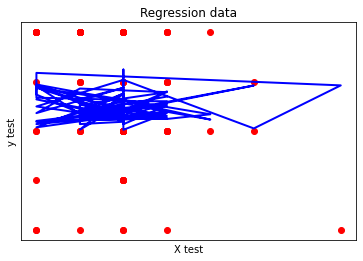

In [91]:
#Age is not a predictor of health score
plt.scatter(X_test["age"], y_test,  color='red')
plt.plot(X_test["age"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

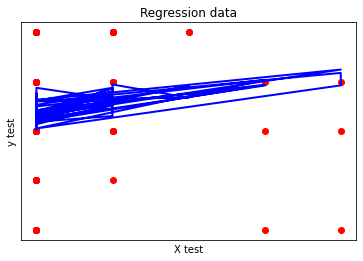

In [93]:
plt.scatter(X_test["Dalc"], y_test,  color='red')
plt.plot(X_test["Dalc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

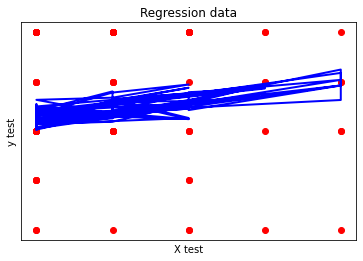

In [99]:
plt.scatter(X_test["Walc"], y_test,  color='red')
plt.plot(X_test["Walc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(X_test["Walc"], y_test,  color='red')
plt.plot(X_test["Walc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

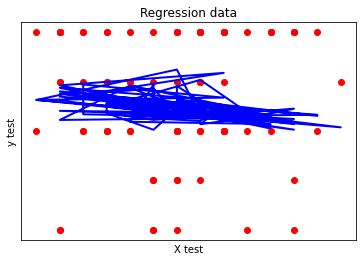

In [100]:
plt.scatter(X_test["G1"], y_test,  color='red')
plt.plot(X_test["G1"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

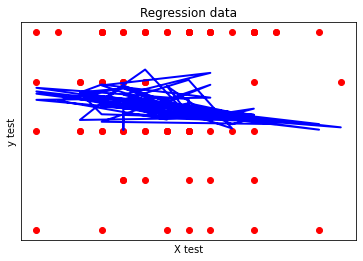

In [101]:
plt.scatter(X_test["G2"], y_test,  color='red')
plt.plot(X_test["G2"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

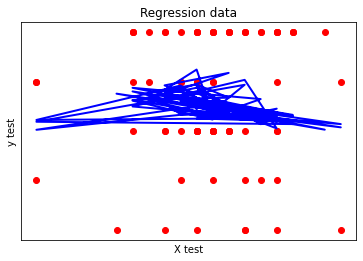

In [102]:
plt.scatter(X_test["G3"], y_test,  color='red')
plt.plot(X_test["G3"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

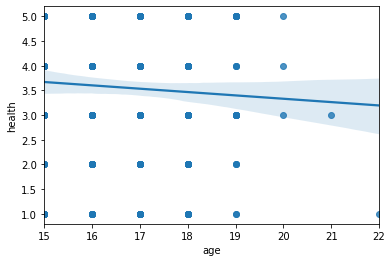

In [96]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='age', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["age"], reg.predict(x_line["age"]), 'r--')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

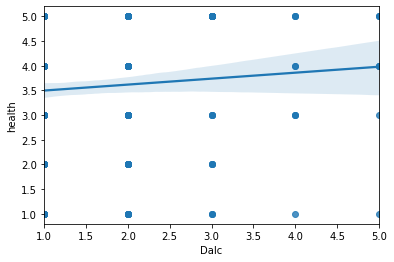

In [98]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='Dalc', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["Dalc"], reg.predict(x_line["Dalc"]), 'r--')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

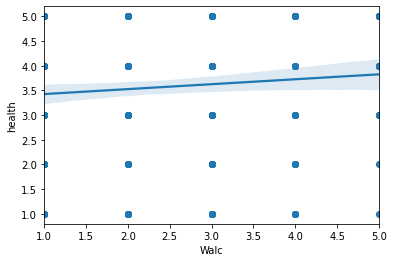

In [103]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='Walc', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["Walc"], reg.predict(x_line["Walc"]), 'r--')
plt.show()

In [ ]:
["age", "Dalc", "Walc", "G1", "G2", "G3"]]

## Repeating Linear regression with more values

In [7]:
por_class = pd.read_csv("../datasets/student-por.csv")

In [88]:
por_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [89]:
por_class = pd.get_dummies(por_class, columns=s, prefix=s)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
